# Environment set-up

In [70]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [71]:
import pathlib
path = pathlib.Path('/content/gdrive/MyDrive/Fyp')
try:
    path.mkdir()
    %cd '/content/gdrive/MyDrive/Fyp'
    ! git clone https://github.com/TanShengRong/FYP-RPI-RF-Sensing
    %cd './FYP-RPI-RF-Sensing/dataset/'
    print('Project folder created in your GoogleDrive')
except FileExistsError:
    %cd '/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing/'
    ! git pull
    %cd './dataset/'

/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing
Already up to date.
/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing/dataset


In [72]:
pwd

'/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing/dataset'

In [73]:
ls

gestureA/  gestureD/  gestureG/            net.pth
gestureB/  gestureE/  gestureH/            specifications.txt
gestureC/  gestureF/  gestureInitial.jpeg


# Preliminary findings

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

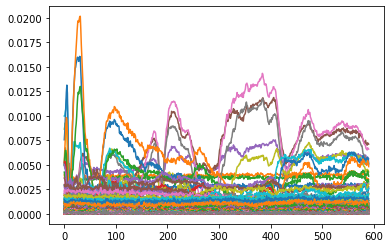

'\n>> ii = ans(:, 1:138);\n>> qq = ans(:, 139:end-1);\n>> iq = ii+j*qq;\n>> imagesc(abs(iq))\n>> plot(abs(iq(1,:)))\n'

In [75]:
df = pd.read_csv("./gestureA/degree0/1.csv") # shape = duration(millisecond?) x readings
shape = df.shape # (row,col)
tmp = [ _ for _ in range(138)]
ii = df.iloc[:, 0:138]
ii.columns = tmp
qq = df.iloc[:, 138:shape[1]-1 ]
qq.columns = tmp
iq = ii.add(qq, fill_value=None) # fill_value defaults as None
iq = abs(iq)
# iq.plot(kind="hexbin", x=)
iq.plot(legend=None)
plt.show()
"""
>> ii = ans(:, 1:138);
>> qq = ans(:, 139:end-1);
>> iq = ii+j*qq;
>> imagesc(abs(iq))
>> plot(abs(iq(1,:)))
"""

Doesn't seem to make much sense...

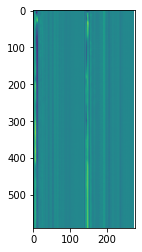

In [76]:
df = pd.read_csv("./gestureA/degree0/1.csv") # shape = duration(millisecond?) x readings
plt.imshow(df)

real part:      -0.002386  -0.000261  -0.000187  ...  -0.000036.1  -0.000046  0.000002.1
0    -0.005643  -0.001515  -0.000928  ...     0.000028  -0.000072    0.000075
1    -0.005669  -0.001547  -0.001125  ...    -0.000008   0.000040    0.000020
2    -0.005537  -0.001585  -0.001039  ...     0.000133   0.000132    0.000153
3    -0.005658  -0.001485  -0.000915  ...     0.000214   0.000157    0.000177
4    -0.005567  -0.001344  -0.000692  ...     0.000138   0.000191    0.000280
..         ...        ...        ...  ...          ...        ...         ...
586  -0.005643  -0.001698  -0.000864  ...    -0.000110  -0.000053    0.000039
587  -0.005464  -0.001522  -0.000700  ...     0.000037   0.000015    0.000037
588  -0.005358  -0.001482  -0.000734  ...     0.000160   0.000102    0.000201
589  -0.005195  -0.001356  -0.000842  ...     0.000124  -0.000055   -0.000042
590  -0.005188  -0.001158  -0.000578  ...    -0.000071  -0.000035    0.000052

[591 rows x 138 columns]


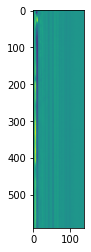

In [77]:
real = df.iloc[:, 0:138]
print('real part: {}'.format(real))
plt.imshow(real)

imag part:      0.001698  -0.000387  -0.000508  ...  0.000006.2  -0.000041  -0.000030.2
0    0.002730  -0.002448  -0.003332  ...    0.000045   0.000075     0.000064
1    0.002854  -0.002074  -0.002728  ...   -0.000035  -0.000011     0.000062
2    0.003109  -0.001813  -0.002556  ...    0.000195   0.000081     0.000017
3    0.003080  -0.001986  -0.002713  ...    0.000012  -0.000035    -0.000068
4    0.002880  -0.002185  -0.002834  ...    0.000025   0.000096     0.000191
..        ...        ...        ...  ...         ...        ...          ...
586  0.002989  -0.001958  -0.002530  ...   -0.000051   0.000007    -0.000002
587  0.003234  -0.001858  -0.002395  ...    0.000170   0.000173     0.000079
588  0.003043  -0.002138  -0.002766  ...    0.000266   0.000188     0.000173
589  0.002851  -0.002227  -0.002652  ...    0.000141   0.000046     0.000057
590  0.002629  -0.002325  -0.002680  ...   -0.000063  -0.000087    -0.000070

[591 rows x 138 columns]


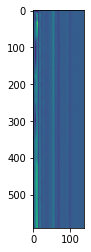

In [78]:
imag = df.iloc[:, 138:277-1 ]
print('imag part: {}'.format(imag))
plt.imshow(imag)

In [79]:
df = pd.DataFrame({'wspd':[10.23,2.4,30.6], 'wdir':[2.3,7.8,4]})
df['com'] = df['wspd'] + df['wdir'] * 1j
print (df)

    wspd  wdir                  com
0  10.23   2.3  10.230000+2.300000j
1   2.40   7.8   2.400000+7.800000j
2  30.60   4.0  30.600000+4.000000j


In [80]:
real.iloc[0]

-0.002386     -0.005643
-0.000261     -0.001515
-0.000187     -0.000928
0.000144       0.000789
0.000442       0.002431
                 ...   
-0.000004.1    0.000048
-0.000010      0.000100
-0.000036.1    0.000028
-0.000046     -0.000072
0.000002.1     0.000075
Name: 0, Length: 138, dtype: float64

# Deep Learning

In [81]:
ls

gestureA/  gestureD/  gestureG/            net.pth
gestureB/  gestureE/  gestureH/            specifications.txt
gestureC/  gestureF/  gestureInitial.jpeg


In [82]:
pwd

'/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset'

## Dataloading

In [94]:
#=== Params ===#
DATASET_DIR = '/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing/dataset/'
GESTURE_DEGREE = "degree0"
DATA_ROW_LOWER_LIMIT = 200
DATA_ROW_UPPER_LIMIT = 400 #540 # 12s -> 600 (3 transitions)
BATCH_SIZE = 1
NUM_WORKERS = 2

In [95]:
#=== Dataloading ===#
import os
from torch.utils.data import Dataset
import numpy as np
from torch.utils.data import DataLoader


class GestureDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        # self.root_dir = '/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing/dataset/'
        self.gesture_list = self.getGestureList()
        self.gesturePerFolder = 30 # change this if increasing no. of sample per gesture per degree
        self.gestureDegree = GESTURE_DEGREE
        self.transform = transform
    
    def __len__(self):
        return len(self.gesture_list) * self.gesturePerFolder
        
    def __getitem__(self, idx):
        item_gesture_type_idx = idx // self.gesturePerFolder
        item_gesture_type = self.gesture_list[item_gesture_type_idx],
        item_idx = idx % self.gesturePerFolder
        # print(item_gesture_type_idx, item_gesture_type[0], item_idx)
        item_gesture_path = os.path.join(
            self.root_dir,   
            item_gesture_type[0],
            self.gestureDegree,
            str(item_idx+1) + ".csv"
            )
        item_gesture_df = pd.read_csv(item_gesture_path, header=0) 
        real = item_gesture_df.iloc[ DATA_ROW_LOWER_LIMIT:DATA_ROW_UPPER_LIMIT, :138 ]
        imag = item_gesture_df.iloc[ DATA_ROW_LOWER_LIMIT:DATA_ROW_UPPER_LIMIT, 138:277-1 ] * 1j
        comp = abs(real.add(imag, fill_value=(0)))
        
        features = comp.values
        features = torch.FloatTensor(features)
        features = features.view(1, DATA_ROW_UPPER_LIMIT-DATA_ROW_LOWER_LIMIT, 276)
        targets = np.zeros(len(self.gesture_list))
        targets[item_gesture_type_idx] = 1
        targets = torch.FloatTensor(targets)
        sample = {'features': features, 'targets': targets}
        # if self.transform:
        #     sample = self.transform(sample)
        return sample
        
    def getGestureList(self):
        gestureList = []
        for _, dirnames, filenames in os.walk(self.root_dir):
            if any("gesture" in dirname for dirname in dirnames):
                gestureList += dirnames
        print(gestureList)
        return gestureList

train_data = GestureDataset(DATASET_DIR)

['gestureA', 'gestureB', 'gestureC', 'gestureE', 'gestureF', 'gestureG', 'gestureH', 'gestureD']


In [96]:
#=== printing some data from a dataset ===#
import torch 

for i in range(len(train_data)):
    sample = train_data[i]

    print(i)
    print(sample)
    print(sample['features'].shape)
    print(sample['targets'].shape)

    if i == 3:
        break

0
{'features': tensor([[[3.8000e-05, 9.4400e-04, 2.4600e-04,  ..., 2.6490e-03,
          3.1970e-03, 2.5000e-03],
         [1.3600e-04, 1.0810e-03, 3.5800e-04,  ..., 2.7250e-03,
          3.2440e-03, 2.7530e-03],
         [8.0000e-05, 1.3770e-03, 3.6000e-04,  ..., 2.9460e-03,
          3.4550e-03, 2.8400e-03],
         ...,
         [1.5000e-05, 2.0230e-03, 3.2400e-04,  ..., 2.3020e-03,
          2.6930e-03, 2.7160e-03],
         [8.0000e-05, 1.9880e-03, 4.7400e-04,  ..., 2.2000e-03,
          2.3480e-03, 2.5930e-03],
         [3.0000e-06, 1.9530e-03, 4.4400e-04,  ..., 2.1340e-03,
          2.3160e-03, 2.6390e-03]]]), 'targets': tensor([1., 0., 0., 0., 0., 0., 0., 0.])}
torch.Size([1, 200, 276])
torch.Size([8])
1
{'features': tensor([[[8.7000e-05, 8.2000e-05, 1.8100e-04,  ..., 8.9360e-03,
          1.0075e-02, 3.7200e-03],
         [7.0000e-06, 1.1300e-04, 1.8000e-05,  ..., 8.7540e-03,
          9.8970e-03, 3.7830e-03],
         [1.0000e-05, 1.5200e-04, 1.4500e-04,  ..., 8.9410e-03,
  

In [97]:
dataloader = DataLoader(train_data,
                            batch_size=BATCH_SIZE, shuffle=True,
                            num_workers=NUM_WORKERS)

In [98]:
#=== printing some data from a batch ===#
# Helper function to show a batch
# def show_landmarks_batch(sample_batched):
#     """Show image with landmarks for a batch of samples."""
#     images_batch, landmarks_batch = \
#             sample_batched['image'], sample_batched['landmarks']
#     batch_size = len(images_batch)
#     im_size = images_batch.size(2)
#     grid_border_size = 2

#     grid = utils.make_grid(images_batch)
#     plt.imshow(grid.numpy().transpose((1, 2, 0)))

#     for i in range(batch_size):
#         plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size + (i + 1) * grid_border_size,
#                     landmarks_batch[i, :, 1].numpy() + grid_border_size,
#                     s=10, marker='.', c='r')

#         plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    # print(i_batch, sample_batched['image'].size(),
    #       sample_batched['landmarks'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        print()
        print(sample_batched['features'])
        print(sample_batched['targets'])
        break


tensor([[[[5.4200e-04, 9.5000e-05, 3.8700e-04,  ..., 7.8010e-03,
           1.4469e-02, 1.5025e-02],
          [4.1100e-04, 2.1000e-04, 4.3200e-04,  ..., 7.8890e-03,
           1.4128e-02, 1.4977e-02],
          [4.8400e-04, 2.2900e-04, 1.8700e-04,  ..., 7.6450e-03,
           1.4129e-02, 1.4877e-02],
          ...,
          [3.4300e-04, 5.8000e-05, 4.3400e-04,  ..., 1.1980e-03,
           8.1200e-04, 3.2060e-03],
          [3.5400e-04, 6.8000e-05, 4.5600e-04,  ..., 1.1790e-03,
           6.8000e-04, 3.2920e-03],
          [3.6700e-04, 5.0000e-05, 3.7800e-04,  ..., 1.6510e-03,
           7.6000e-05, 3.8840e-03]]]])
tensor([[0., 1., 0., 0., 0., 0., 0., 0.]])


In [99]:
df = pd.read_csv("./gestureA/degree0/1.csv", header=0) 

real = df.iloc[ :, 0:138 ]
imag = df.iloc[ :, 138:277-1 ]
print(type(imag.iloc[0,0]))
comp = abs(real.add(imag, fill_value=0))

# print(df)
# print(real)
# print(imag)
# print(comp)
# print(real.iloc[:,0])
# print(df.iloc[:,138])
# print(comp.iloc[:,0])
# print(comp.values)
print(comp.shape)
print(type(comp))
print(type(comp.values))
comp_tensor = torch.tensor(comp.values)
print(comp_tensor.shape)

<class 'numpy.float64'>
(591, 276)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
torch.Size([591, 276])


## 2D CNN - FCNN

In [120]:
#== MODEL ==#
import torch.nn as nn
import torch.nn.functional as F


class Net2(nn.Module):

    def __init__(self):
        super(Net2, self).__init__()
        '''
        conv2D, input should be in (N, C, H, W) format. 
        N is the number of samples/batch_size. C is the channels. H and W are height and width resp.
        '''
        self.conv1 = nn.Conv2d(1, 8, 2, 5, padding=1)
        self.conv2 = nn.Conv2d(8, 17, 2, 5, padding=1)
        
        self.fc1 = nn.Linear(102, 8)
        # self.fc2 = nn.Linear(120, 60)
        # self.fc3 = nn.Linear(60, 8)

    def forward(self, x):
        x = self.conv1(x)
        # print('conv1', x.shape)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        # print('maxpool', x.shape)
        x = self.conv2(x)
        # print('conv2', x.shape)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        # print('maxpool', x.shape)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        # print('fc1', x)
        x = F.softmax(x, dim=1)
        # x = self.fc2(x)
        # x = F.relu(x)
        # print('fc2', x.shape)
        # x = self.fc3(x)
        # x = F.relu(x)
        # print('fc3', x.shape)

        return x

net2 = Net2()
print(net2)

Net2(
  (conv1): Conv2d(1, 8, kernel_size=(2, 2), stride=(5, 5), padding=(1, 1))
  (conv2): Conv2d(8, 17, kernel_size=(2, 2), stride=(5, 5), padding=(1, 1))
  (fc1): Linear(in_features=102, out_features=8, bias=True)
)


In [121]:
for i_batch, sample_batched in enumerate(dataloader):
    if i_batch == 1:
        print(sample_batched)
        print(sample_batched['features'].shape)

        output = net2(sample_batched['features'])
        print('out', output.shape)
        print(output)

        target = sample_batched['targets']
        # target = target.view(1, -1)  # make it the same shape as output
        criterion = nn.MSELoss()

        loss = criterion(output, target)
        print('loss', loss)
        print(loss.grad_fn)  # MSELoss
        print(loss.grad_fn.next_functions[0][0])  # Linear
        print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

        break
#=== The learnable parameters of a model are returned by net.parameters() ===#
params = list(net2.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

{'features': tensor([[[[2.2000e-04, 1.5700e-03, 1.8500e-04,  ..., 2.2410e-03,
           5.1500e-03, 3.6970e-03],
          [2.8600e-04, 1.3980e-03, 1.0000e-04,  ..., 2.4660e-03,
           5.1390e-03, 3.8470e-03],
          [2.5200e-04, 1.5180e-03, 4.7000e-05,  ..., 2.5650e-03,
           5.4740e-03, 4.0110e-03],
          ...,
          [2.1000e-04, 8.0700e-04, 5.8000e-05,  ..., 3.4470e-03,
           2.5370e-03, 1.9330e-03],
          [4.0000e-06, 8.8000e-04, 1.0500e-04,  ..., 3.4000e-03,
           2.5220e-03, 1.9530e-03],
          [2.3000e-05, 6.9800e-04, 6.9000e-05,  ..., 3.1750e-03,
           2.5480e-03, 1.6800e-03]]]]), 'targets': tensor([[0., 0., 0., 0., 0., 0., 1., 0.]])}
torch.Size([1, 1, 200, 276])
out torch.Size([1, 8])
tensor([[0.1291, 0.1186, 0.1243, 0.1389, 0.1280, 0.1151, 0.1272, 0.1187]],
       grad_fn=<SoftmaxBackward>)
loss tensor(0.1089, grad_fn=<MseLossBackward>)
6
torch.Size([8, 1, 2, 2])


In [122]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(net2.parameters(), lr=0.001, momentum=0.5)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(dataloader):
        inputs = data['features']
        labels = data['targets']

        optimizer.zero_grad() # zero the gradient buffers

        # forward + backward + optimize
        outputs = net2(inputs)
        # print(outputs.shape)
        # print(labels.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() # Does the update

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 20 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0
print('Finished Training')

[1,    20] loss: 0.109
[1,    40] loss: 0.109
[1,    60] loss: 0.109
[1,    80] loss: 0.109
[1,   100] loss: 0.109
[1,   120] loss: 0.109
[1,   140] loss: 0.109
[1,   160] loss: 0.110
[1,   180] loss: 0.110
[1,   200] loss: 0.109
[1,   220] loss: 0.110
[1,   240] loss: 0.110
[2,    20] loss: 0.109
[2,    40] loss: 0.110
[2,    60] loss: 0.110
[2,    80] loss: 0.109
[2,   100] loss: 0.109
[2,   120] loss: 0.109
[2,   140] loss: 0.109
[2,   160] loss: 0.109
[2,   180] loss: 0.109
[2,   200] loss: 0.109
[2,   220] loss: 0.109
[2,   240] loss: 0.109
[3,    20] loss: 0.109
[3,    40] loss: 0.110
[3,    60] loss: 0.110
[3,    80] loss: 0.109
[3,   100] loss: 0.110
[3,   120] loss: 0.109
[3,   140] loss: 0.109
[3,   160] loss: 0.109
[3,   180] loss: 0.109
[3,   200] loss: 0.110
[3,   220] loss: 0.110
[3,   240] loss: 0.109
[4,    20] loss: 0.110
[4,    40] loss: 0.110
[4,    60] loss: 0.110
[4,    80] loss: 0.109
[4,   100] loss: 0.109
[4,   120] loss: 0.109
[4,   140] loss: 0.109
[4,   160] 

In [123]:
torch.save(net2.state_dict(), '/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset/net.pth')

In [124]:
for i_batch, sample_batched in enumerate(dataloader):
    net2 = Net2()
    net2.load_state_dict(torch.load('/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset/net.pth'))
    
    # if i_batch == 1:
        # print(sample_batched)
    _, actual = torch.max(sample_batched['targets'], 1)
    print('actual', actual)

    outputs = net2(sample_batched['features'])
    # print('outputs', outputs)
    _, predicted = torch.max(outputs, 1)
    print('predicted', predicted)
    if (predicted == actual):
        print('correct!')
        # break

actual tensor([5])
predicted tensor([3])
actual tensor([7])
predicted tensor([3])
actual tensor([0])
predicted tensor([3])
actual tensor([3])
predicted tensor([3])
correct!
actual tensor([0])
predicted tensor([3])
actual tensor([1])
predicted tensor([3])
actual tensor([0])
predicted tensor([3])
actual tensor([6])
predicted tensor([3])
actual tensor([5])
predicted tensor([3])
actual tensor([0])
predicted tensor([3])
actual tensor([4])
predicted tensor([3])
actual tensor([1])
predicted tensor([3])
actual tensor([7])
predicted tensor([3])
actual tensor([6])
predicted tensor([3])
actual tensor([3])
predicted tensor([3])
correct!
actual tensor([5])
predicted tensor([3])
actual tensor([5])
predicted tensor([3])
actual tensor([4])
predicted tensor([3])
actual tensor([5])
predicted tensor([3])
actual tensor([3])
predicted tensor([3])
correct!
actual tensor([2])
predicted tensor([3])
actual tensor([2])
predicted tensor([3])
actual tensor([4])
predicted tensor([3])
actual tensor([1])
predicted t

## 3D CNN - FCNN

In [157]:
#== MODEL ==#
import torch.nn as nn
import torch.nn.functional as F


class Net3(nn.Module):

    def __init__(self):
        super(Net3, self).__init__()
        '''
        conv2D, input should be in (N, C, H, W) format. 
        N is the number of samples/batch_size. C is the channels. H and W are height and width resp.
        '''
        self.conv1 = nn.Conv3d(1, 7, 3, 5, padding=1)
        self.conv2 = nn.Conv3d(7, 11, 3, 5, padding=1)
        
        self.fc1 = nn.Linear(1056, 8)

    def forward(self, x):
        x = self.conv1(x)
        # print('conv1', x.shape)
        x = F.relu(x)
        x = F.max_pool3d(x, 1)
        # print('maxpool', x.shape)
        x = self.conv2(x)
        # print('conv2', x.shape)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        # print('fc1', x.shape)
        x = F.softmax(x, dim=1)

        return x

net3 = Net3()
print(net3)

Net3(
  (conv1): Conv3d(1, 7, kernel_size=(3, 3, 3), stride=(5, 5, 5), padding=(1, 1, 1))
  (conv2): Conv3d(7, 11, kernel_size=(3, 3, 3), stride=(5, 5, 5), padding=(1, 1, 1))
  (fc1): Linear(in_features=1056, out_features=8, bias=True)
)


In [158]:
for i_batch, sample_batched in enumerate(dataloader):
    if i_batch == 1:
        print(sample_batched)
        print(sample_batched['features'].shape)

        output = net3(sample_batched['features'].view(1,1,1,200,276))
        print('out', output.shape)
        print(output)

        target = sample_batched['targets']
        # target = target.view(1, -1)  # make it the same shape as output
        criterion = nn.MSELoss()

        loss = criterion(output, target)
        print('loss', loss)
        print(loss.grad_fn)  # MSELoss
        print(loss.grad_fn.next_functions[0][0])  # Linear
        print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

        break
#=== The learnable parameters of a model are returned by net.parameters() ===#
params = list(net3.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

{'features': tensor([[[[5.2700e-04, 1.6100e-04, 3.9400e-04,  ..., 2.2980e-03,
           8.6990e-03, 9.2980e-03],
          [6.8900e-04, 3.7700e-04, 2.6600e-04,  ..., 2.1760e-03,
           8.8690e-03, 9.3820e-03],
          [5.3500e-04, 7.2000e-05, 3.7700e-04,  ..., 2.0380e-03,
           8.7760e-03, 9.3290e-03],
          ...,
          [5.4500e-04, 2.9700e-04, 1.1900e-04,  ..., 9.6120e-03,
           1.4380e-03, 2.3980e-03],
          [4.7300e-04, 2.8500e-04, 1.1400e-04,  ..., 9.4830e-03,
           1.8250e-03, 2.3470e-03],
          [5.1100e-04, 2.8900e-04, 1.0300e-04,  ..., 9.5490e-03,
           1.7690e-03, 2.2900e-03]]]]), 'targets': tensor([[0., 0., 0., 0., 1., 0., 0., 0.]])}
torch.Size([1, 1, 200, 276])
out torch.Size([1, 8])
tensor([[0.1262, 0.1254, 0.1212, 0.1221, 0.1305, 0.1211, 0.1242, 0.1293]],
       grad_fn=<SoftmaxBackward>)
loss tensor(0.1080, grad_fn=<MseLossBackward>)
6
torch.Size([7, 1, 3, 3, 3])


In [159]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(net3.parameters(), lr=0.001, momentum=0.5)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(dataloader):
        inputs = data['features'].view(1,1,1,200,276)
        labels = data['targets']

        optimizer.zero_grad() # zero the gradient buffers

        # forward + backward + optimize
        outputs = net3(inputs)
        # print(outputs.shape)
        # print(labels.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() # Does the update

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 20 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0
print('Finished Training')

[1,    20] loss: 0.109
[1,    40] loss: 0.110
[1,    60] loss: 0.109
[1,    80] loss: 0.109
[1,   100] loss: 0.109
[1,   120] loss: 0.109
[1,   140] loss: 0.110
[1,   160] loss: 0.109
[1,   180] loss: 0.109
[1,   200] loss: 0.109
[1,   220] loss: 0.109
[1,   240] loss: 0.109
[2,    20] loss: 0.109
[2,    40] loss: 0.110
[2,    60] loss: 0.109
[2,    80] loss: 0.109
[2,   100] loss: 0.109
[2,   120] loss: 0.110
[2,   140] loss: 0.109
[2,   160] loss: 0.110
[2,   180] loss: 0.110
[2,   200] loss: 0.109
[2,   220] loss: 0.109
[2,   240] loss: 0.110
[3,    20] loss: 0.109
[3,    40] loss: 0.109
[3,    60] loss: 0.109
[3,    80] loss: 0.109
[3,   100] loss: 0.109
[3,   120] loss: 0.109
[3,   140] loss: 0.109
[3,   160] loss: 0.110
[3,   180] loss: 0.109
[3,   200] loss: 0.109
[3,   220] loss: 0.109
[3,   240] loss: 0.109
[4,    20] loss: 0.110
[4,    40] loss: 0.110
[4,    60] loss: 0.110
[4,    80] loss: 0.109
[4,   100] loss: 0.109
[4,   120] loss: 0.109
[4,   140] loss: 0.109
[4,   160] 

In [160]:
torch.save(net3.state_dict(), '/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset/net3.pth')

In [163]:
for i_batch, sample_batched in enumerate(dataloader):
    net3 = Net3()
    net3.load_state_dict(torch.load('/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset/net3.pth'))
    
    # if i_batch == 1:
        # print(sample_batched)
    _, actual = torch.max(sample_batched['targets'], 1)
    print('actual', actual)

    outputs = net3(sample_batched['features'].view(1,1,1,200,276))
    # print('outputs', outputs)
    _, predicted = torch.max(outputs, 1)
    print('predicted', predicted)
    if (predicted == actual):
        print('correct!')
        # break

actual tensor([6])
predicted tensor([4])
actual tensor([0])
predicted tensor([4])
actual tensor([5])
predicted tensor([4])
actual tensor([3])
predicted tensor([4])
actual tensor([0])
predicted tensor([4])
actual tensor([6])
predicted tensor([4])
actual tensor([4])
predicted tensor([4])
correct!
actual tensor([5])
predicted tensor([4])
actual tensor([6])
predicted tensor([4])
actual tensor([3])
predicted tensor([4])
actual tensor([5])
predicted tensor([4])
actual tensor([3])
predicted tensor([4])
actual tensor([0])
predicted tensor([4])
actual tensor([4])
predicted tensor([4])
correct!
actual tensor([6])
predicted tensor([4])
actual tensor([3])
predicted tensor([4])
actual tensor([1])
predicted tensor([4])
actual tensor([1])
predicted tensor([4])
actual tensor([3])
predicted tensor([4])
actual tensor([7])
predicted tensor([4])
actual tensor([7])
predicted tensor([4])
actual tensor([1])
predicted tensor([4])
actual tensor([1])
predicted tensor([4])
actual tensor([3])
predicted tensor([4]

# Conclusions

Both 2d and 3d models seem to be skewed towards a particular gesture. 